In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import the MLPClassifier from neural_network from sklearn
from sklearn.neural_network import MLPClassifier
#import the pipeline from sklearn
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE

In [111]:
estimators = []

ac = pd.read_csv('accidents_preprocessed.csv')
ac = ac.drop(columns=['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude'])
ac.head()

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1


### Preprocess Target class casualty_severity
#### -Note:  Fatal and Serious together in one class and slight in the other

In [112]:

ac['casualty_severity'] = ac['casualty_severity'].replace(2, 1)
ac['casualty_severity'] = ac['casualty_severity'].replace(3, 0)

ac[ac.casualty_severity == 1]

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
12,2,1,11,3,165.0,3,6,20,-1,4,...,0,0,1,1,7,1598,1,16,3,1
13,2,1,11,3,287.0,3,6,30,6,2,...,0,0,1,1,7,109,1,5,2,1
14,2,1,11,3,545.0,3,2,20,-1,4,...,0,0,4,1,6,124,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68795,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
68797,1,3,7,7,30.0,3,6,60,0,-1,...,0,0,0,2,4,1400,1,15,7,3
68799,2,1,7,7,960.0,-1,6,20,0,-1,...,0,0,3,2,9,1997,1,13,5,2
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


In [113]:
one_hot_list = ['first_road_class', 'road_type', 'junction_detail', 'junction_control', 'light_conditions',
                'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards',
                'urban_or_rural_area', 'trunk_road_flag', 'casualty_class', 'sex_of_casualty', 'car_passenger',
                'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'towing_and_articulation',
                'vehicle_manoeuvre', 'vehicle_location_restricted_lane', 'junction_location',
                'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway',
                'hit_object_off_carriageway', 'first_point_of_impact', 'sex_of_driver', 'propulsion_code',
                'driver_imd_decile', 'driver_home_area_type']

#Maybe change speed limit
ordinal_list = ['number_of_vehicles', 'number_of_casualties', 'month', 'day_of_week', 'time', 'speed_limit',
                'age_band_of_casualty', 'age_band_of_driver', 'engine_capacity_cc', 'age_of_vehicle']

In [114]:
#Reset the indices
ac = ac.reset_index(drop=True)

ac.head(n=10)


,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
5,2,1,11,2,970.0,-1,6,30,3,4,...,0,0,3,1,6,998,1,3,2,1
6,2,1,11,2,1226.0,4,6,20,3,2,...,0,0,1,1,7,125,1,0,5,1
7,1,1,11,2,1350.0,3,1,40,1,4,...,0,0,1,1,4,-1,-1,-1,6,1
8,2,1,11,2,1123.0,5,-1,30,0,-1,...,0,0,1,1,7,-1,-1,-1,-1,-1
9,2,1,11,2,1320.0,5,6,30,3,4,...,7,2,3,2,7,1499,2,2,1,1


In [115]:
accidents = ac.copy()

#replace missing (-1) values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=-1, strategy='mean')

y = accidents['casualty_severity']
accidents = accidents.drop(columns=['casualty_severity'])

one_hot_encoder = OneHotEncoder(sparse =True)
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        # use OneHotEncoder for Outlook and Wind
        ('encoder', OneHotEncoder(), one_hot_list),
        # use StandardScaler for Temperature and Humidity
        ('scaler', StandardScaler(), ordinal_list)
    ])

pipe = Pipeline(steps=[("preprocessor", preprocessor), ("imputer", imp), ("estimator", None)])

In [116]:
accidents

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68800,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,3,2,9,998,1,2,7,1
68801,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,1,1,7,998,1,1,8,1
68802,2,1,7,7,1065.0,3,6,30,3,4,...,0,0,3,2,9,1498,1,1,7,1
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


# First Splits and Models

In [117]:
y

0        1
1        1
2        0
3        0
4        0
        ..
68800    0
68801    0
68802    0
68803    1
68804    1
Name: casualty_severity, Length: 68805, dtype: int64

In [118]:
accidents

,number_of_vehicles,number_of_casualties,month,day_of_week,time,first_road_class,road_type,speed_limit,junction_detail,junction_control,...,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
0,2,1,11,2,1220.0,5,6,20,0,-1,...,0,0,3,1,5,113,1,4,-1,-1
1,2,1,11,4,710.0,5,6,30,3,4,...,-1,-1,-1,1,4,125,1,4,1,1
2,2,1,11,2,1171.0,3,2,20,3,2,...,0,0,2,1,7,125,1,0,3,1
3,2,1,11,2,1153.0,5,6,30,0,-1,...,0,0,4,1,7,124,1,7,6,1
4,2,1,11,2,994.0,3,-1,20,5,4,...,-1,-1,1,2,5,125,1,6,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68800,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,3,2,9,998,1,2,7,1
68801,2,2,7,7,1082.0,3,6,20,0,-1,...,0,0,1,1,7,998,1,1,8,1
68802,2,1,7,7,1065.0,3,6,30,3,4,...,0,0,3,2,9,1498,1,1,7,1
68803,1,1,7,7,1169.0,3,6,60,0,-1,...,0,0,1,1,8,998,1,20,10,1


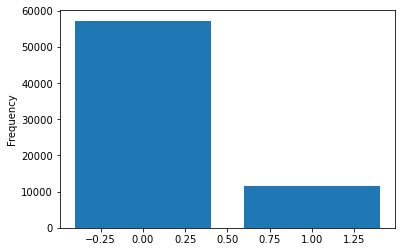

In [119]:
#Some Plots

class_dist = y.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()

In [120]:
from imblearn.over_sampling import SMOTE
#Undersampling/Oversampling:

#sampler = RandomOverSampler()
#sampler = RandomUnderSampler()
sampler = SMOTE()

X = accidents


In [121]:
#split test and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_balanced, y_balanced = sampler.fit_resample(X_train, y_train)
#class_dist = pd.Series(X_balanced).value_counts()
#plt.bar(class_dist.index, class_dist)
#plt.ylabel("Frequency")
#plt.show()

In [122]:
# Do Preprocessing without pipeline
X_onehot = X.copy()
X_onehot
encoded = pd.DataFrame(one_hot_encoder.fit_transform(X_onehot[one_hot_list]).toarray(),
                       columns=one_hot_encoder.get_feature_names(one_hot_list))
X_onehot = X_onehot.drop(columns=one_hot_list)
X_onehot = X_onehot.join(encoded)
X_onehot[:] = scaler.fit_transform(X_onehot[:])
#Scale all columns to Standard Distribution
X_onehot[:] = imp.fit_transform(X_onehot[:])
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(X_onehot, y, test_size=0.2, random_state=42, stratify=y)
X_prep_balanced, y_prep_balanced = sampler.fit_resample(X_prep_train, y_prep_train)

# Creating models

In [123]:
#Logistic Regression
weight_estimator = LogisticRegression(max_iter=20000)

#K-Nearest-Neighbors
neigh = KNeighborsClassifier(n_neighbors=3)

#Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=0)

#Neural Network
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu',
learning_rate_init=1e-3, batch_size=64, verbose=True,
early_stopping=True, random_state=1234)


estimators = [clf, weight_estimator, neigh, model]
estimators

[MLPClassifier(batch_size=64, early_stopping=True,
               hidden_layer_sizes=(100, 100, 100), random_state=1234,
               verbose=True),
 LogisticRegression(max_iter=20000),
 KNeighborsClassifier(n_neighbors=3),
 RandomForestClassifier(random_state=0)]

# Run estimators

In [ ]:
#iterate over list
for estimator in estimators:
   print(estimator)
   pipe.set_params(estimator = estimator)
   pipe.fit(X_balanced, y_balanced)
   prediction = pipe.predict(X_test)
   print(classification_report(y_test, prediction))

MLPClassifier(batch_size=64, early_stopping=True,
              hidden_layer_sizes=(100, 100, 100), random_state=1234,
              verbose=True)
Iteration 1, loss = 0.31709601
Validation score: 0.869879
Iteration 2, loss = 0.28661473
Validation score: 0.872938
Iteration 3, loss = 0.27629311
Validation score: 0.874030
Iteration 4, loss = 0.26667918
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11441
           1       0.45      0.24      0.31      2320

    accuracy                           0.82     13761
   macro avg       0.66      0.59      0.60     13761
weighted avg       0.79      0.82      0.80     13761

LogisticRegression(max_iter=20000)


C:\Users\Tobi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11441
           1       0.41      0.25      0.31      2320

    accuracy                           0.81     13761
   macro avg       0.64      0.59      0.60     13761
weighted avg       0.78      0.81      0.79     13761

KNeighborsClassifier(n_neighbors=3)


In [125]:

logreg2 = LogisticRegression(max_iter = 5000)
rfe = RFE(logreg2,20, verbose=1)
#pipe.set_params(estimator=rfe)
pipe.set_params(estimator= rfe)
pipe.fit(X_train,y_train)

C:\Users\Tobi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting estimator with 226 features.
Fitting estimator with 225 features.
Fitting estimator with 224 features.
Fitting estimator with 223 features.
Fitting estimator with 222 features.
Fitting estimator with 221 features.
Fitting estimator with 220 features.
Fitting estimator with 219 features.
Fitting estimator with 218 features.
Fitting estimator with 217 features.
Fitting estimator with 216 features.
Fitting estimator with 215 features.
Fitting estimator with 214 features.
Fitting estimator with 213 features.
Fitting estimator with 212 features.
Fitting estimator with 211 features.
Fitting estimator with 210 features.
Fitting estimator with 209 features.
Fitting estimator with 208 features.
Fitting estimator with 207 features.
Fitting estimator with 206 features.
Fitting estimator with 205 features.
Fitting estimator with 204 features.
Fitting estimator with 203 features.
Fitting estimator with 202 features.
Fitting estimator with 201 features.
Fitting estimator with 200 features.
F

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('encoder', OneHotEncoder(),
                                                  ['first_road_class',
                                                   'road_type',
                                                   'junction_detail',
                                                   'junction_control',
                                                   'light_conditions',
                                                   'weather_conditions',
                                                   'road_surface_conditions',
                                                   'special_conditions_at_site',
                                                   'carriageway_hazards',
                                                   'urban_or_rural_area',
                                                   'trunk_road_flag',
                                                   'casualty_class',
                       

In [126]:
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False False
 False  True False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False False  True False
 False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False  True False False False False False False False False False False
  True False False False False False False False False  True  True False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False  True  True False False False Fa

In [127]:
X_t = X_prep_train[X_prep_train.columns[rfe.support_]]
import statsmodels.api as sm
logit_model = sm.Logit(y_prep_train,X_t)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.690906
         Iterations 4
                                  Results: Logit
Model:                    Logit                  Pseudo R-squared:      -0.523    
Dependent Variable:       casualty_severity      AIC:                   76100.4789
Date:                     2021-11-20 17:05       BIC:                   76278.7967
No. Observations:         55044                  Log-Likelihood:        -38030.   
Df Model:                 19                     LL-Null:               -24969.   
Df Residuals:             55024                  LLR p-value:           1.0000    
Converged:                1.0000                 Scale:                 1.0000    
No. Iterations:           4.0000                                                  
----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------

In [128]:
logreg2.fit(X_t, y_train)
pred = logreg2.predict(X_test[X_test.columns[rfe.support_]])
print("Accuracy: " , logreg2.score(X_test[X_test.columns[rfe.support_]],y_test))


IndexError: boolean index did not match indexed array along dimension 0; dimension is 40 but corresponding boolean dimension is 226